# Deployment session prep: generate simple classification model and save

* Data are from a real project, anonymized and with noise-added.
* Binary classification problem: categorize samples into 'good' (class 0) and 'bad' (class 1).
* Each sample consists of a time series.
* 25 good, 25 bad samples (in real life, expectation that num. good samples >> num. bad samples)
* Data has been preprocessed in the following way:


time series -> feature generation (70) -> normalization -> upsampling of data using SMOTE (Synthetic Minority Over-sampling Technique) to 200 good and 150 bad ones -> add a ittle noise -> dimension reduction (PCA, 2)



In [1]:
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import joblib
# own stuff
import visualize

In [2]:
# Some useful pyplot graphics default settings (for some freaking reason this always has to run twice)
plt.rcParams['figure.figsize'] = 16, 10
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

In [3]:
data = np.load("data.npz")
y = data["y"]
X = data["X"]

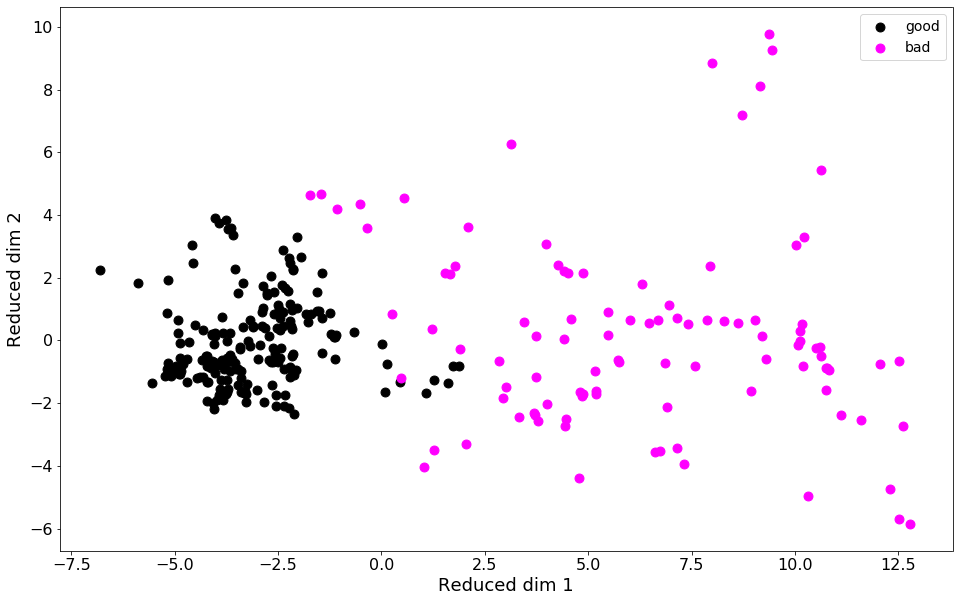

In [4]:
# let's take a look
visualize.scatter_plot(X, y.astype(bool))

### Set up a simple model for classification

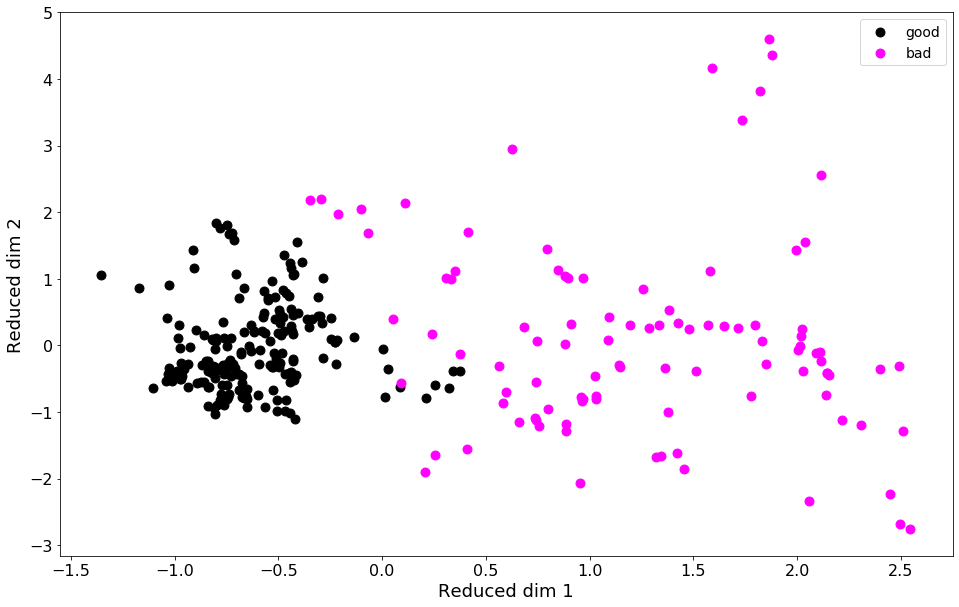

In [5]:
# scale & inspect again
scaler = StandardScaler()
X = scaler.fit_transform(X)
visualize.scatter_plot(X, y.astype(bool))

In [6]:
# split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
%whos

Variable             Type              Data/Info
------------------------------------------------
LogisticRegression   type              <class 'sklearn.linear_mo<...>stic.LogisticRegression'>
StandardScaler       type              <class 'sklearn.preproces<...>ing.data.StandardScaler'>
X                    ndarray           300x2: 600 elems, type `float64`, 4800 bytes
X_test               ndarray           75x2: 150 elems, type `float64`, 1200 bytes
X_train              ndarray           225x2: 450 elems, type `float64`, 3600 bytes
data                 NpzFile           <numpy.lib.npyio.NpzFile <...>object at 0x7f5c71c42150>
joblib               module            <module 'joblib' from '/h<...>ages/joblib/__init__.py'>
np                   module            <module 'numpy' from '/ho<...>kages/numpy/__init__.py'>
plt                  module            <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
scaler               StandardScaler    StandardScaler(copy=True,<...>mean=True, w

In [7]:
# set up & train model
mdl = LogisticRegression(random_state=0, solver='saga', penalty='elasticnet', l1_ratio = 0.5, C=1, max_iter=500, verbose=1)
mdl.fit(X_train, y_train)

convergence after 34 epochs took 0 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.5, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='elasticnet',
                   random_state=0, solver='saga', tol=0.0001, verbose=1,
                   warm_start=False)

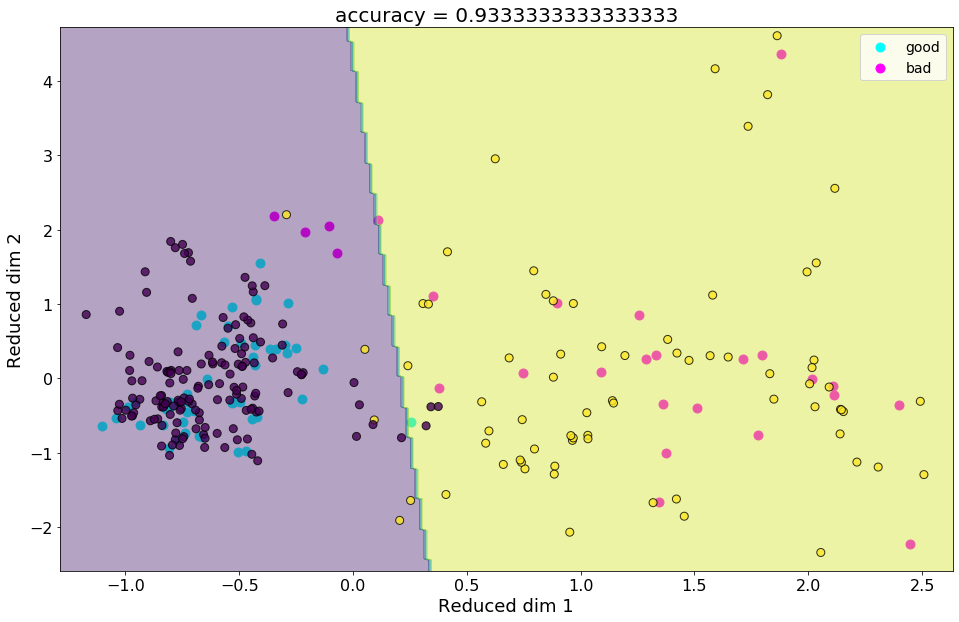

In [8]:
# evaluate
score = mdl.score(X_test, y_test)
axh = plt.subplot(111)
visualize.scatter_plot(X_test, y_test.astype(bool), color=['cyan','magenta'], axh=axh)
visualize.plot_decision_function(X_train, y_train, mdl, axh)
plt.title("accuracy = {}".format(str(score)));

In [9]:
# check:
mdl.predict_proba(np.r_[-0.25, 0].reshape(1, -1))

array([[0.89775998, 0.10224002]])

In [11]:
# save model
joblib.dump(mdl, 'binary_classification.model')

['binary_classification.model']